In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
columnNames = ['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']

df = pd.read_csv('../data/hepatitis.data', names = columnNames)

In [44]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [45]:
df.replace("?", np.nan, inplace=True)

In [46]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

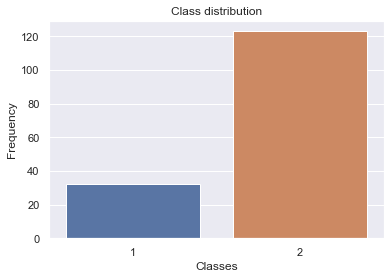

In [56]:
sns.set(style="darkgrid")
sns.barplot(x="Class", y="cnt", data = {"Class": [1, 2], "cnt": [len(df[df['Class'] == 1]), len(df[df['Class'] == 2])]})
plt.title("Class distribution")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

In [60]:
#Handling of Missing data
#Numerical variables
#Convert the type of numerical variables
numerical_variables = ['AGE', 'BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK PHOSPHATE', 'SGOT']
df["BILIRUBIN"] = df.BILIRUBIN.astype(float)
df["PROTIME"] = df.PROTIME.astype(float)
df["ALK PHOSPHATE"] = df["ALK PHOSPHATE"].astype(float)
df["SGOT"] = df.SGOT.astype(float)
df["ALBUMIN"] = df.ALBUMIN.astype(float)
#Fill empty spaces by using mean value
for i in numerical_variables:
    df[i] = df[i].fillna(df[i].mean())

df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           0
ALK PHOSPHATE       0
SGOT                0
ALBUMIN             0
PROTIME             0
HISTOLOGY           0
dtype: int64

In [71]:
#Categorical variables
categorical_variables = ['SEX' , 'STEROID', 'ANTIVIRALS', 'FATIGUE','MALAISE','ANOREXIA','LIVER BIG','LIVER FIRM','SPLEEN PALPABLE',
'SPIDERS','ASCITES','VARICES', 'HISTOLOGY']
#Fill in the missing data using most frequent data of each category
for i in categorical_variables:
    df[i] = df[i].fillna(int(df[i].mode()))

df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [77]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18.0,4.0,61.852273,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42.0,3.5,61.852273,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32.0,4.0,61.852273,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52.0,4.0,80.000000,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.325397,200.0,4.0,61.852273,1


In [78]:
df.to_csv('../data/hepatitis.csv')

In [75]:
from sklearn.preprocessing import StandardScaler

#Standardizing the scale
sc=StandardScaler()
sc.fit(df.drop(["Class","PROTIME","BILIRUBIN"], axis = 1))
scaled_features = sc.transform(df.drop(["Class","PROTIME","BILIRUBIN"], axis = 1))
X = scaled_features
y = df["Class"]

In [ ]:
# Split dataset in training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=3)
#Split and generate imbalance test/train set
class_nobalance = pd.Series(y_train).value_counts().plot.bar()
class_nobalance.set_title("Outcome ytrain (Without SMOTE)")
#Split and generate balance test/train set using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())
class_balance = pd.Series(y_train_new).value_counts().plot.bar()
class_balance.set_title("Outcome ytrain (SMOTE)")